In [68]:
import pandas as pd 
df = pd.read_csv('/Users/Isabel/Desktop/JORDI/movies.txt', sep = '::', engine ='python', encoding = 'ISO-8859-1', names = ['Index','Nom de la pel.lícula', 'Genere'])
df


,Index,Nom de la pel.lícula,Genere
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


In [69]:
df.isnull().sum()

Index                   0
Nom de la pel.lícula    0
Genere                  0
dtype: int64

In [70]:
df.shape
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Index                 3883 non-null   int64 
 1   Nom de la pel.lícula  3883 non-null   object
 2   Genere                3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


In [71]:
# Separamos el año vía RegEx

df['Any'] = df['Nom de la pel.lícula'].str.extract(r'\((\d{4})\)') 


In [72]:
# Separamos Genere via RegEx

df[['Genere','Genere1']] = df['Genere'].str.split('|',n=1, expand=True) 
df.head()


,Index,Nom de la pel.lícula,Genere,Any,Genere1
0,1,Toy Story (1995),Animation,1995,Children's|Comedy
1,2,Jumanji (1995),Adventure,1995,Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy,1995,Romance
3,4,Waiting to Exhale (1995),Comedy,1995,Drama
4,5,Father of the Bride Part II (1995),Comedy,1995,None


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Index                 3883 non-null   int64 
 1   Nom de la pel.lícula  3883 non-null   object
 2   Genere                3883 non-null   object
 3   Any                   3883 non-null   object
 4   Genere1               1858 non-null   object
dtypes: int64(1), object(4)
memory usage: 151.8+ KB


In [74]:
z = df['Genere'].value_counts()
z

Drama          1176
Comedy         1024
Action          503
Horror          262
Adventure       155
Crime           131
Documentary     123
Thriller        101
Animation        90
Children's       89
Romance          50
Sci-Fi           46
Mystery          36
Western          33
Film-Noir        25
Musical          25
War              12
Fantasy           2
Name: Genere, dtype: int64

<Axes: xlabel='Genere', ylabel='count'>

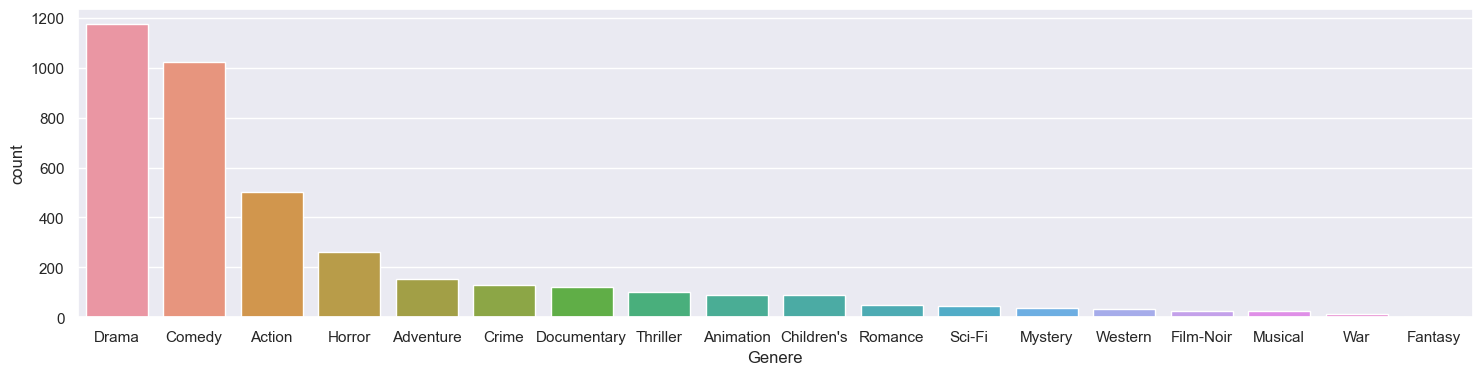

In [75]:
# Hacemos un primer gràfico para visualizar el numero total de películas por genero.


import seaborn as sns

sns.set(rc={"figure.figsize":(18, 4)}) #width=18, height=4

sns.countplot(x='Genere',data=df, order = df['Genere'].value_counts().index)


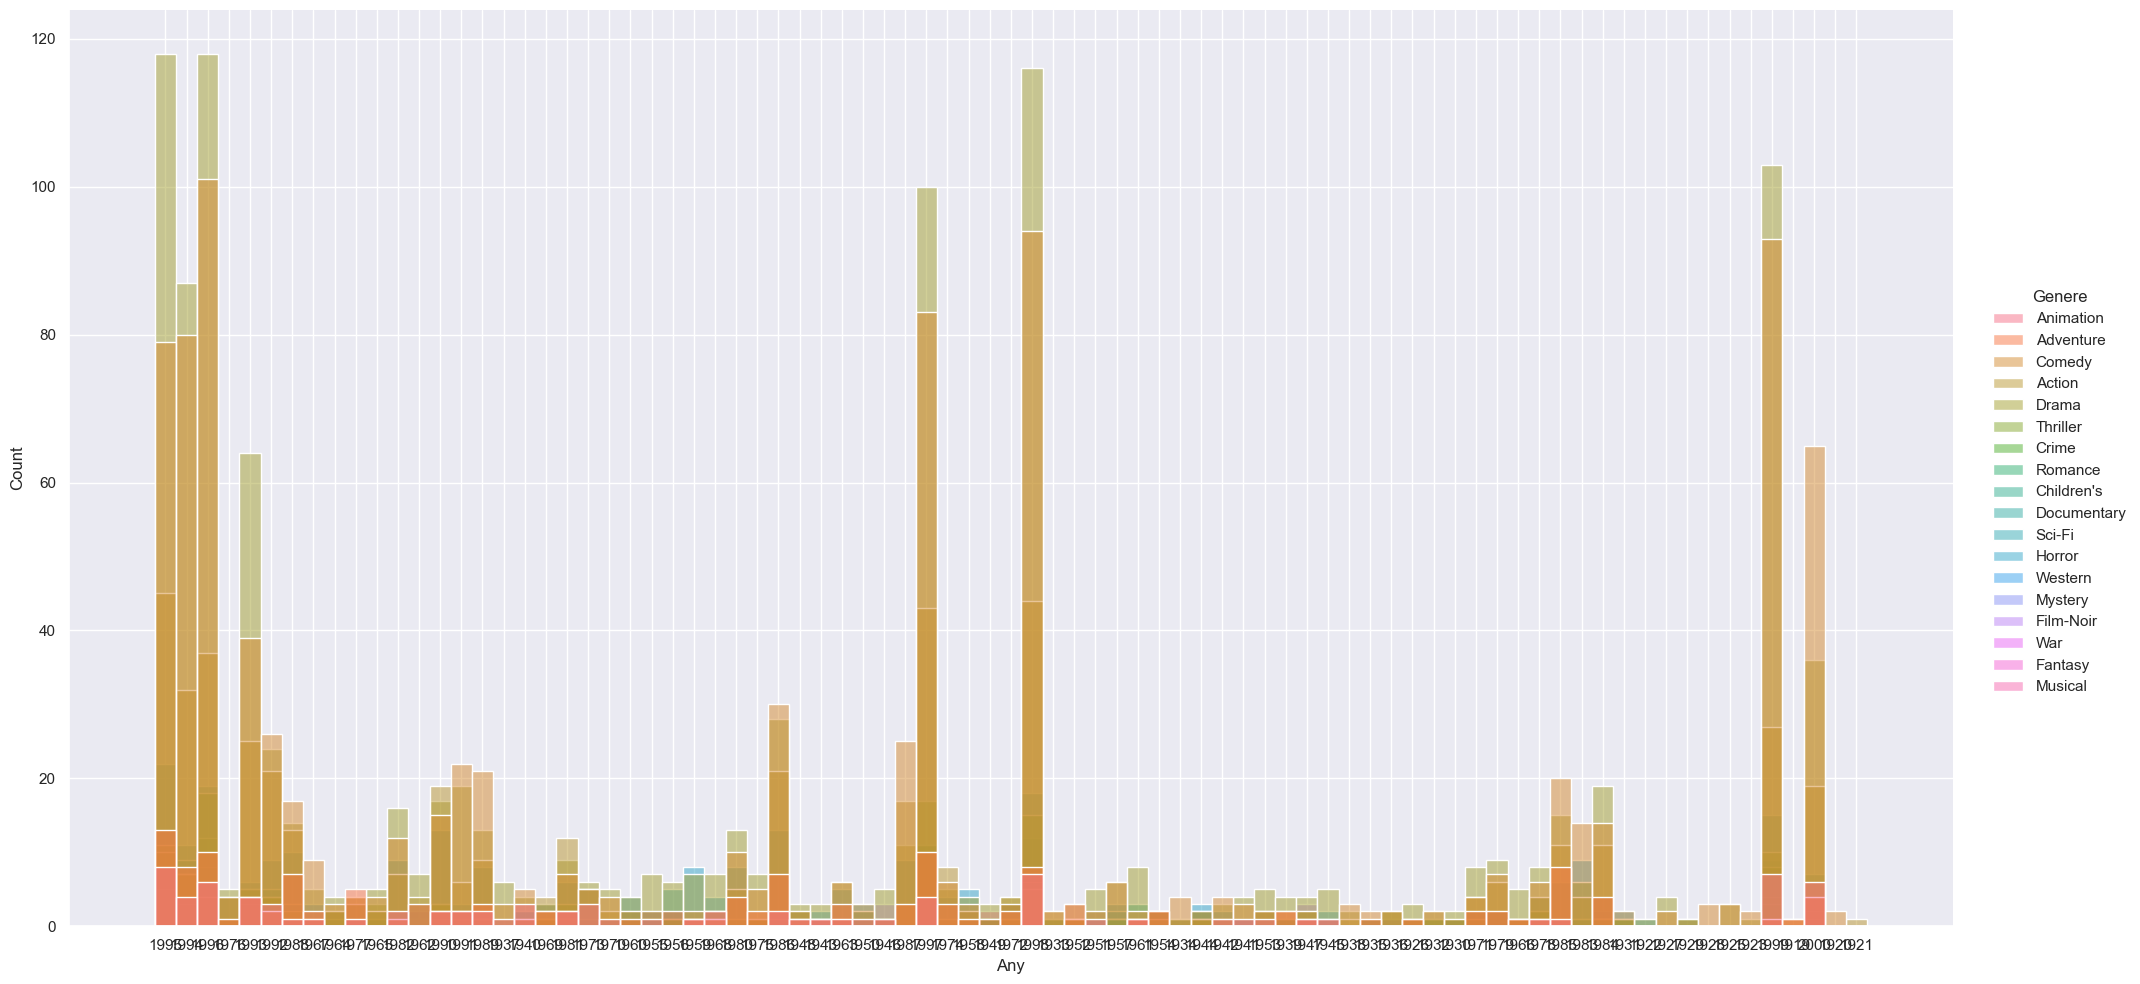

In [80]:
# Hacemos un segundo gràfico donde visualizamos los generos producidos segun la década. Queríamos visualizar si guerras/Crisis/etc determinaban el tipo de películas producidas . Idealmente lo haríamos por Décadas en lugar de Año, pero me fallan las fuerzas...

sns.set(rc={"figure.figsize":(25, 4)}) #width=25, height=4

sns.displot(data = df, x ='Any', hue =df['Genere'] , height =10, aspect = 2)